# DATASOLVE - WOLTERS KLUWER

**IMPORTING HEADERS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**Connecting to Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd drive/MyDrive/datasolve

/content/drive/MyDrive/datasolve


**Reading the Training, Testing and Sample Submission File**

In [5]:
train_df=pd.read_csv('train.csv')
train_df

,id,name,document_text,cat_name
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime
...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions


In [6]:
test_df=pd.read_csv('test.csv')
test_df

,id,name,document_text
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...
...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con..."
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ..."
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...


In [7]:
sample_df=pd.read_csv('sample_submission.csv')
sample_df.head(200)

,id,predictions
0,11176_Accounting and Finance,1
1,11176_Antitrust,0
2,11176_Banking,1
3,11176_Broker Dealer,0
4,11176_Commodities Trading,0
...,...,...
195,11727_Securities Management,0
196,11727_Securities Sales,0
197,11727_Securities Settlement,1
198,11727_Trade Pricing,0


**Data Information**

In [8]:
sample_df.predictions.unique()  # unique values of the predictions
# 1 represents that it belongs to a particular category
# 0 represents that it does not belong to a particular category 

array([1, 0])

In [9]:
train_df.cat_name.unique() # 50 category names

array(['Corporate Communications', 'Securities Settlement', 'Antitrust',
       'Financial Crime', 'Commodities Trading', 'Examinations',
       'Insurance', 'Required Disclosures', 'Consumer protection',
       'Market Risk', 'Natural Disasters', 'Securities Management',
       'Information Filing', 'Quotation', 'Financial Accounting',
       'Securities Clearing', 'Listing', 'Records Maintenance',
       'Delivery', 'Monetary and Economic Policy', 'Banking',
       'Regulatory Actions', 'Securities Sales', 'Compliance Management',
       'Fees and Charges', 'Licensing', 'Legal Proceedings',
       'Corporate Governance', 'Exemptions', 'Legal',
       'Contract Provisions', 'Payments and Settlements', 'IT Risk',
       'Trade Pricing', 'Licensure and certification', 'Trade Settlement',
       'Market Abuse', 'Regulatory Reporting', 'Powers and Duties',
       'Money-Laundering and Terrorist Financing',
       'Accounting and Finance', 'Fraud', 'Broker Dealer',
       'Securities Issui

In [10]:
xd=np.asarray(train_df.cat_name.unique())
xd.size

50

In [11]:
def max_strike_group(x, col):
    x = x[col]
    a = x != 0
    out = a.cumsum()-a.cumsum().where(~a).ffill().fillna(0).astype(int)
    return out.max()

In [12]:
xd=train_df.groupby("id").apply(lambda x:max_strike_group(x, "id")).sort_values()

In [13]:
xd

id
31174     1
15972     1
7333      1
28150     1
52418     1
         ..
26795    17
11757    17
5234     18
31880    19
34352    28
Length: 9859, dtype: int64

In [14]:
grp = xd.groupby('id')
da  = grp.groups
groups_as_list=[]

for entity_id,show in grp:
    groups_as_list.append(show)# append all dfs in a list

In [15]:
groups_as_list

[id
 4772    7
 dtype: int64, id
 4774    4
 dtype: int64, id
 4775    8
 dtype: int64, id
 4776    5
 dtype: int64, id
 4778    5
 dtype: int64, id
 4779    8
 dtype: int64, id
 4780    6
 dtype: int64, id
 4781    15
 dtype: int64, id
 4782    9
 dtype: int64, id
 4783    6
 dtype: int64, id
 4784    6
 dtype: int64, id
 4785    7
 dtype: int64, id
 4786    8
 dtype: int64, id
 4789    3
 dtype: int64, id
 4792    6
 dtype: int64, id
 4793    5
 dtype: int64, id
 4797    2
 dtype: int64, id
 4798    5
 dtype: int64, id
 4799    2
 dtype: int64, id
 4801    6
 dtype: int64, id
 4804    4
 dtype: int64, id
 4805    4
 dtype: int64, id
 4807    5
 dtype: int64, id
 4808    5
 dtype: int64, id
 4809    4
 dtype: int64, id
 4811    4
 dtype: int64, id
 4813    3
 dtype: int64, id
 4814    1
 dtype: int64, id
 4815    8
 dtype: int64, id
 4816    4
 dtype: int64, id
 4817    1
 dtype: int64, id
 4818    4
 dtype: int64, id
 4819    4
 dtype: int64, id
 4822    4
 dtype: int64, id
 4824    

In [16]:
train_df

,id,name,document_text,cat_name
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime
...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions


In [17]:
train_df[train_df.id.isin([11176, 11372])]

,id,name,document_text,cat_name
2029,11372,"Altice USA, INC. - Partial Self Tender Offer O...",The Options Clearing Corporation (OCC) has pub...,Contract Provisions
4266,11372,"Altice USA, INC. - Partial Self Tender Offer O...",The Options Clearing Corporation (OCC) has pub...,Securities Settlement
6986,11372,"Altice USA, INC. - Partial Self Tender Offer O...",The Options Clearing Corporation (OCC) has pub...,Securities Clearing
9108,11372,"Altice USA, INC. - Partial Self Tender Offer O...",The Options Clearing Corporation (OCC) has pub...,Compliance Management
15463,11176,FAQ: COVID-19 - FAQ of 4 December 2020: New Qu...,Commission de Surveillance du Secteur Financie...,Accounting and Finance
17902,11176,FAQ: COVID-19 - FAQ of 4 December 2020: New Qu...,Commission de Surveillance du Secteur Financie...,Natural Disasters
17932,11176,FAQ: COVID-19 - FAQ of 4 December 2020: New Qu...,Commission de Surveillance du Secteur Financie...,Required Disclosures
18970,11176,FAQ: COVID-19 - FAQ of 4 December 2020: New Qu...,Commission de Surveillance du Secteur Financie...,Banking
20382,11176,FAQ: COVID-19 - FAQ of 4 December 2020: New Qu...,Commission de Surveillance du Secteur Financie...,Information Filing
20985,11176,FAQ: COVID-19 - FAQ of 4 December 2020: New Qu...,Commission de Surveillance du Secteur Financie...,Money Services


In [18]:
sample_df[sample_df.predictions.isin([1])]

,id,predictions
0,11176_Accounting and Finance,1
2,11176_Banking,1
14,11176_Fees and Charges,1
15,11176_Financial Accounting,1
20,11176_Information Filing,1
31,11176_Money Services,1
33,11176_Natural Disasters,1
39,11176_Regulatory Reporting,1
40,11176_Required Disclosures,1
55,11372_Compliance Management,1


**PRE-PROCESSING - Removing Stopwords, Lemmatization**

In [19]:
mod_train_df=train_df

In [20]:
mod_train_df['mod_text']=mod_train_df['document_text']  # copying document_text column in mod_text column

In [21]:
mod_train_df.drop(['id','name'],axis=1)

,document_text,cat_name,mod_text
0,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,"At a special meeting held on March 24, 2021 sh..."
1,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,"On April 2, 2021, the China Financial Futures ..."
2,The Securities and Futures Commission (SFC) ha...,Antitrust,The Securities and Futures Commission (SFC) ha...
3,Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,Pursuant to Section 2.6.2 of the Clearing Hous...
4,Money laundering and terrorism financing (ML/T...,Financial Crime,Money laundering and terrorism financing (ML/T...
...,...,...,...
47097,National Securities Clearing Corporation (NSCC...,Corporate Governance,National Securities Clearing Corporation (NSCC...
47098,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,"On January 14, 2020, the Hong Kong Monetary Au..."
47099,Securities and Exchange Board of India ('SEBI'...,Fraud,Securities and Exchange Board of India ('SEBI'...
47100,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,"The Federal Reserve Bank of Atlanta (""Reserve ..."


In [22]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].str.lower() # Converting all text to lowercase


In [23]:
# Remove Whitespaces from thw Text
def remove_whitespace(records):
  records_after_removal_whitespaces = " ".join(records.split())
  return  records_after_removal_whitespaces

In [24]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].apply(remove_whitespace)

In [25]:
mod_train_df

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,"at a special meeting held on march 24, 2021 sh..."
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,"on april 2, 2021, the china financial futures ..."
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,the securities and futures commission (sfc) ha...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant to section 2.6.2 of the clearing hous...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering and terrorism financing (ml/t...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation (nscc...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,"on january 14, 2020, the hong kong monetary au..."
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities and exchange board of india ('sebi'...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,"the federal reserve bank of atlanta (""reserve ..."


In [26]:
# Removing Numbers from the Text 
import re
def remove_num(text):
  new_string = ''.join((x for x in text if not x.isdigit()))
  return(new_string)

In [27]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].apply(remove_num)
mod_train_df

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,"at a special meeting held on march , sharehol..."
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,"on april , , the china financial futures excha..."
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,the securities and futures commission (sfc) ha...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant to section .. of the clearing house p...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering and terrorism financing (ml/t...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation (nscc...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,"on january , , the hong kong monetary authorit..."
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities and exchange board of india ('sebi'...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,"the federal reserve bank of atlanta (""reserve ..."


In [28]:
# Removing Stopwords from text as they have no meaning 
en_stopwords = stopwords.words('english')
def remove_stopwords(text):
    
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
          
    return result

In [29]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].apply(lambda X: word_tokenize(X))


In [30]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].apply(remove_stopwords)
mod_train_df

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,"[special, meeting, held, march, ,, shareholder..."
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,"[april, ,, ,, china, financial, futures, excha..."
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,"[securities, futures, commission, (, sfc, ), s..."
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,"[pursuant, section, .., clearing, house, proce..."
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,"[money, laundering, terrorism, financing, (, m..."
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,"[national, securities, clearing, corporation, ..."
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,"[january, ,, ,, hong, kong, monetary, authorit..."
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,"[securities, exchange, board, india, (, 'sebi,..."
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,"[federal, reserve, bank, atlanta, (, ``, reser..."


In [31]:
# Removing Special Characters 
def remove_tag(text):
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [32]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].apply(remove_tag)

In [33]:
mod_train_df

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,"special meeting held march , shareholders navi..."
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,"april , , china financial futures exchange pub..."
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,securities futures commission ( sfc ) suspende...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant section .. clearing house procedures ...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering terrorism financing ( ml/tf )...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation ( nsc...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,"january , , hong kong monetary authority ( hkm..."
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities exchange board india ( 'sebi ' ) re...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,federal reserve bank atlanta ( `` reserve bank...


In [34]:
temp=mod_train_df['mod_text'][1]
temp

'april , , china financial futures exchange published announcement approving change membership futures companies . china financial futures exchange approved change jinpeng futures brokerage co. , ltd. zhongtian futures co. , ltd. trading members trading settlement members . far , cicc total members , including full settlement members futures companies , trading settlement members , trading members ; non-futures company trading settlement members .'

In [35]:
def rem_punct(sentences):
    tokens = nltk.word_tokenize(sentences)
    words = [w.lower() for w in tokens if w.isalnum()]
    #print tokens
    return ' '.join(words)

In [36]:
mod_train_df['mod_text'] = mod_train_df['mod_text'].apply(rem_punct)

In [37]:
mod_train_df

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,special meeting held march shareholders navios...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,april china financial futures exchange publish...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,securities futures commission sfc suspended sh...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant section clearing house procedures hkf...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering terrorism financing financial...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation nscc ...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,january hong kong monetary authority hkma rele...
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities exchange board india receipt alert ...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,federal reserve bank atlanta reserve bank beco...


In [38]:
copy_mod=mod_train_df

#Visualisation

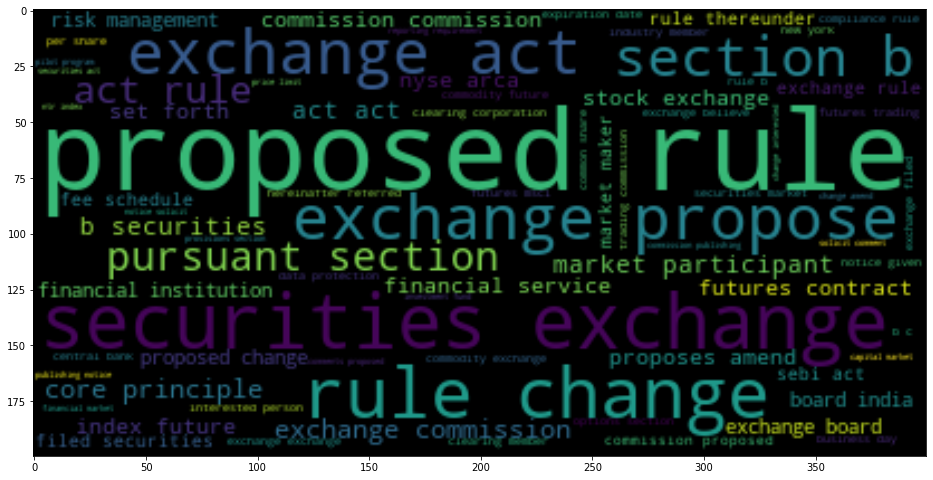

In [39]:
# Word Cloud Showing most Ocurring Words 
totalText=''
for x in mod_train_df['mod_text']:

  totalText=totalText+" " +x
from wordcloud import WordCloud
wc=WordCloud(background_color='black',max_font_size=50).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")



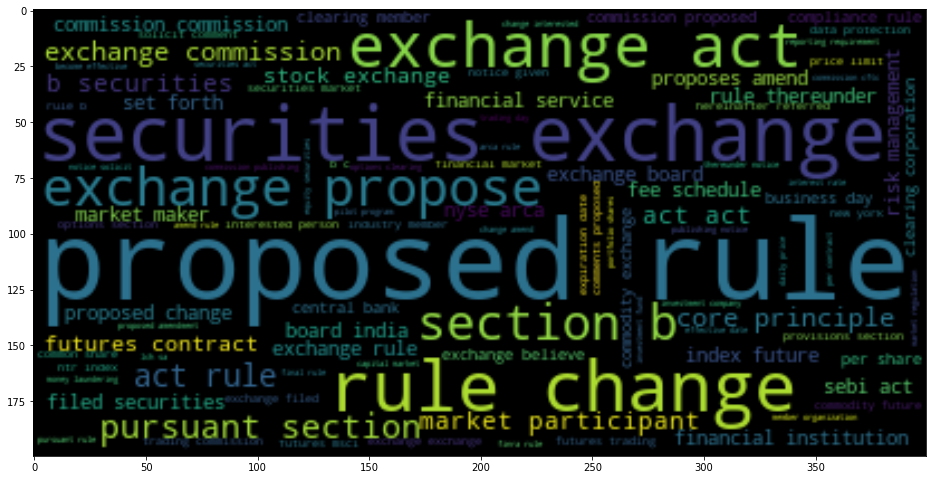

In [40]:
from wordcloud import WordCloud
wc=WordCloud(background_color='black',max_font_size=50).generate(totalText)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")


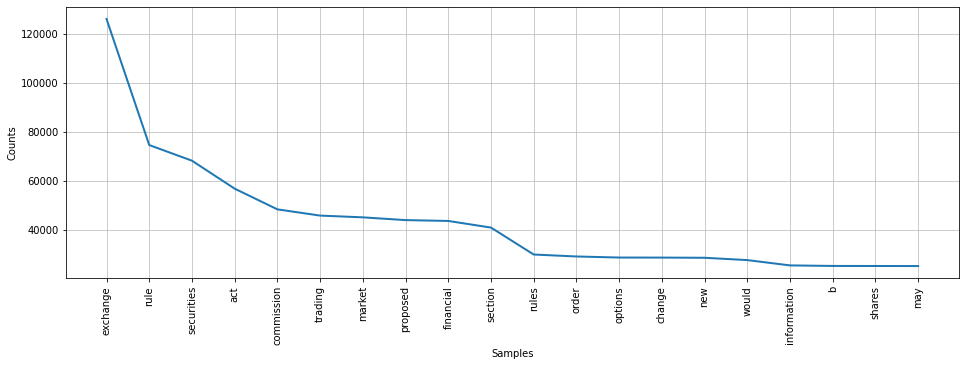

In [41]:
import nltk
from nltk.tokenize import ToktokTokenizer
x=nltk.FreqDist(ToktokTokenizer().tokenize(totalText))
plt.figure(figsize=(16,5))
x.plot(20)

**MODELLING**

In [42]:
mod_train_df

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,special meeting held march shareholders navios...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,april china financial futures exchange publish...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,securities futures commission sfc suspended sh...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant section clearing house procedures hkf...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering terrorism financing financial...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation nscc ...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,january hong kong monetary authority hkma rele...
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities exchange board india receipt alert ...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,federal reserve bank atlanta reserve bank beco...


In [43]:
xd=mod_train_df

In [44]:
xd['cat_name'] = xd['cat_name'].astype(str)

In [45]:
xd

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,special meeting held march shareholders navios...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,april china financial futures exchange publish...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,securities futures commission sfc suspended sh...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant section clearing house procedures hkf...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering terrorism financing financial...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation nscc ...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,january hong kong monetary authority hkma rele...
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities exchange board india receipt alert ...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,federal reserve bank atlanta reserve bank beco...


In [46]:
type(xd['cat_name'][1])

str

In [47]:
xd

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications,special meeting held march shareholders navios...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement,april china financial futures exchange publish...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust,securities futures commission sfc suspended sh...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement,pursuant section clearing house procedures hkf...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime,money laundering terrorism financing financial...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance,national securities clearing corporation nscc ...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy,january hong kong monetary authority hkma rele...
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud,securities exchange board india receipt alert ...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions,federal reserve bank atlanta reserve bank beco...


In [48]:
type(xd['cat_name'])

pandas.core.series.Series

In [49]:
xd['cat_name'] = xd[['document_text','cat_name']].groupby(['document_text'])['cat_name'].transform(lambda x: ','.join(x))
xd[['document_text','cat_name']].drop_duplicates()

,document_text,cat_name
0,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,"On April 2, 2021, the China Financial Futures ...","Securities Settlement,Trade Settlement"
2,The Securities and Futures Commission (SFC) ha...,"Antitrust,Licensing,Examinations,Licensure and..."
3,Pursuant to Section 2.6.2 of the Clearing Hous...,"Securities Settlement,Securities Clearing,Paym..."
4,Money laundering and terrorism financing (ML/T...,"Financial Crime,Regulatory Reporting,Risk Mana..."
...,...,...
17635,"In Mauritius, the EU started negotiations with...",Contract Provisions
17636,"On January 22, 2020, the Depository Trust Comp...","Securities Clearing,Securities Management,Info..."
17638,"On August 28, 2019, Office of the Superintende...","Money Services,Research"
17651,MSE International Clearing issued a circular i...,"Securities Management,Contract Provisions"


**Converting comma separated values into list in category column**

In [50]:
def list_conv(text):
  l=[]
  l = l + text.split(',')
  return l

In [51]:
xd['cat_name']=xd['cat_name'].apply(list_conv)

In [52]:
xd

,id,name,document_text,cat_name,mod_text
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",[Corporate Communications],special meeting held march shareholders navios...
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...","[Securities Settlement, Trade Settlement]",april china financial futures exchange publish...
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,"[Antitrust, Licensing, Examinations, Licensure...",securities futures commission sfc suspended sh...
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,"[Securities Settlement, Securities Clearing, P...",pursuant section clearing house procedures hkf...
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,"[Financial Crime, Regulatory Reporting, Risk M...",money laundering terrorism financing financial...
...,...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,"[Securities Clearing, Fees and Charges, Corpor...",national securities clearing corporation nscc ...
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...","[Banking, Research, Monetary and Economic Policy]",january hong kong monetary authority hkma rele...
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,"[Trade Pricing, Legal Proceedings, Antitrust, ...",securities exchange board india receipt alert ...
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...","[Fraud, Definitions, Financial Crime, Banking,...",federal reserve bank atlanta reserve bank beco...


In [53]:
type(xd['cat_name'][1][0])

str

**Importing Models for Training and Testing the data**

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [55]:
multilabel = MultiLabelBinarizer()  # Sets Labels 0 and 1 depending on whether the category is present or not
y = multilabel.fit_transform(xd['cat_name'])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
multilabel.classes_ # Shows the categories which have been used in labelling


array(['Accounting and Finance', 'Antitrust', 'Banking', 'Broker Dealer',
       'Commodities Trading', 'Compliance Management',
       'Consumer protection', 'Contract Provisions',
       'Corporate Communications', 'Corporate Governance', 'Definitions',
       'Delivery', 'Examinations', 'Exemptions', 'Fees and Charges',
       'Financial Accounting', 'Financial Crime', 'Forms', 'Fraud',
       'IT Risk', 'Information Filing', 'Insurance', 'Legal',
       'Legal Proceedings', 'Licensing', 'Licensure and certification',
       'Liquidity Risk', 'Listing', 'Market Abuse', 'Market Risk',
       'Monetary and Economic Policy', 'Money Services',
       'Money-Laundering and Terrorist Financing', 'Natural Disasters',
       'Payments and Settlements', 'Powers and Duties', 'Quotation',
       'Records Maintenance', 'Regulatory Actions',
       'Regulatory Reporting', 'Required Disclosures', 'Research',
       'Risk Management', 'Securities Clearing', 'Securities Issuing',
       'Securities

In [57]:
pd.DataFrame(y, columns=multilabel.classes_)
# dataframe of the resultant Labels

,Accounting and Finance,Antitrust,Banking,Broker Dealer,Commodities Trading,Compliance Management,Consumer protection,Contract Provisions,Corporate Communications,Corporate Governance,...,Required Disclosures,Research,Risk Management,Securities Clearing,Securities Issuing,Securities Management,Securities Sales,Securities Settlement,Trade Pricing,Trade Settlement
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47097,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
47098,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
47099,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
47100,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Term Frequency Inverse Document Frequency 
tfidf = TfidfVectorizer(analyzer='word', max_features=10000, ngram_range=(1,2), stop_words='english')
X = tfidf.fit_transform(xd['mod_text'])
X.shape, y.shape

((47102, 10000), (47102, 50))

In [59]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
# Using three classifiers -> Stochastic Gradient Descent (SGD), Logistic Regression, Support Vector Machine
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

In [61]:
# Calculating the Jaccard Score
def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean()*100


def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test, y_pred)))
  print('----')

In [62]:
# Model Training
for classifier in [LinearSVC(C=1.5, max_iter=1000, dual=True)]:
  clf_lin = OneVsRestClassifier(classifier)
  clf_lin.fit(X_train, y_train)
  y_pred_linear_svc = clf_lin.predict(X_test)
  print_score(y_pred_linear_svc, classifier)
  

Clf:  LinearSVC
Jacard score: 97.35588863600752
----


In [63]:
# F1 score of the trained model
f1_score(y_test, y_pred_linear_svc, average='micro')

0.9938217122683142

In [64]:
# One VS Rest classifier to train the model 
for classifier in [sgd, lr, svc]:
  clf_rest = OneVsRestClassifier(classifier)
  clf_rest.fit(X_train, y_train)
  y_pred_rest = clf_rest.predict(X_test)
  print_score(y_pred_rest, classifier)

Clf:  SGDClassifier
Jacard score: 78.08861074086758
----


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Clf:  LogisticRegression
Jacard score: 76.67025653322281
----
Clf:  LinearSVC
Jacard score: 96.5198727815098
----


In [65]:
# F1 score of the trained model
f1_score(y_test, y_pred_rest, average='micro')

0.9915195966078387

In [66]:
X_test

<9421x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 1057549 stored elements in Compressed Sparse Row format>

In [67]:
#Testing for one Sample input
x=['The Alberta Securities Commission (ASC) has concluded a Compliance Settlement Agreement with Northern Alliance Financial Corporation (Northern Alliance). Northern Alliance, an Alberta-based issuer and exempt market dealer, admitted to a breach under Alberta securities laws that was discovered in the course of a compliance review by ASC staff. By failing to comply with the limits prescribed in section 2.9(2.1)(b)(iii) of National Instrument 45-106 Prospectus and Registration Exemptions when it sold securities to an eligible investor, Northern Alliance engaged in an illegal distribution. Northern Alliance cooperated with the ASC and under the Settlement Agreement paid $5,000 to the ASC.']

In [68]:
xt = tfidf.transform(x)
clf_lin.predict(xt)

array([[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1]])

In [69]:
arr=multilabel.inverse_transform(clf_lin.predict(xt))

In [70]:
print(arr)

[('Broker Dealer', 'Compliance Management', 'Exemptions', 'Legal', 'Licensure and certification', 'Securities Sales', 'Securities Settlement', 'Trade Settlement')]


In [71]:
test_df=pd.read_csv('test.csv')
test_df

,id,name,document_text
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...
...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con..."
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ..."
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...


In [72]:
test_df

,id,name,document_text
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...
...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con..."
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ..."
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...


In [73]:
sub_df=test_df.copy()

In [74]:
sub_df

,id,name,document_text
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...
...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con..."
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ..."
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...


In [75]:
# Implementing Model on Testing Data
def implement_model(text):
  xt = tfidf.transform([text])
  clf_rest.predict(xt)
  arr=multilabel.inverse_transform(clf_rest.predict(xt))
  return arr

In [76]:
sub_df['categories']=sub_df['document_text'].apply(implement_model)

In [77]:
sub_df

,id,name,document_text,categories
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...,"[(Licensing, Money Services, Payments and Sett..."
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...,"[(Records Maintenance,)]"
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa...","[(Financial Crime, Fraud, Legal Proceedings, R..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain...","[(Compliance Management, Examinations, Financi..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...,"[(Examinations, Financial Crime, Legal Proceed..."
...,...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...,"[(Examinations, Information Filing, Legal Proc..."
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con...","[(Accounting and Finance, Natural Disasters)]"
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ...",[()]
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...,"[(Market Risk, Monetary and Economic Policy)]"


In [78]:
sub_copy=sub_df.copy()
sub_copy

,id,name,document_text,categories
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...,"[(Licensing, Money Services, Payments and Sett..."
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...,"[(Records Maintenance,)]"
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa...","[(Financial Crime, Fraud, Legal Proceedings, R..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain...","[(Compliance Management, Examinations, Financi..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...,"[(Examinations, Financial Crime, Legal Proceed..."
...,...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...,"[(Examinations, Information Filing, Legal Proc..."
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con...","[(Accounting and Finance, Natural Disasters)]"
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ...",[()]
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...,"[(Market Risk, Monetary and Economic Policy)]"


In [79]:
sub_copy_copy=sub_copy.copy()

In [80]:
count=0
for i in sub_copy_copy['id']:
  sub_copy_copy['categories'][count]=list(sub_copy_copy['categories'][count])
  count=count+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
type(sub_copy_copy['categories'][1])

list

In [82]:
type(sub_copy['categories'][1])

list

In [83]:
sub_copy_copy

,id,name,document_text,categories
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...,"[(Licensing, Money Services, Payments and Sett..."
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...,"[(Records Maintenance,)]"
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa...","[(Financial Crime, Fraud, Legal Proceedings, R..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain...","[(Compliance Management, Examinations, Financi..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...,"[(Examinations, Financial Crime, Legal Proceed..."
...,...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...,"[(Examinations, Information Filing, Legal Proc..."
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con...","[(Accounting and Finance, Natural Disasters)]"
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ...",[()]
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...,"[(Market Risk, Monetary and Economic Policy)]"


In [84]:
sub_copy

,id,name,document_text,categories
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...,"[(Licensing, Money Services, Payments and Sett..."
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...,"[(Records Maintenance,)]"
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa...","[(Financial Crime, Fraud, Legal Proceedings, R..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain...","[(Compliance Management, Examinations, Financi..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...,"[(Examinations, Financial Crime, Legal Proceed..."
...,...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...,"[(Examinations, Information Filing, Legal Proc..."
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con...","[(Accounting and Finance, Natural Disasters)]"
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ...",[()]
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...,"[(Market Risk, Monetary and Economic Policy)]"


**Convert List of Tuples into a Single List**

In [85]:
sub_copy['categories'][0][0]

('Licensing', 'Money Services', 'Payments and Settlements')

In [86]:
def conv_to_list(text):
   return list(text[0])


In [87]:
sub_copy_copy['categories']=sub_copy_copy['categories'].apply(conv_to_list)

In [88]:
sub_copy_copy

,id,name,document_text,categories
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...,"[Licensing, Money Services, Payments and Settl..."
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...,[Records Maintenance]
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa...","[Financial Crime, Fraud, Legal Proceedings, Re..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain...","[Compliance Management, Examinations, Financia..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...,"[Examinations, Financial Crime, Legal Proceedi..."
...,...,...,...,...
4988,57160,Adjudication Order in the Matter of Nidhi Gran...,Securities and Exchange Board of India (‘SEBI’...,"[Examinations, Information Filing, Legal Proce..."
4989,57175,World No Tobacco Day Statement By Commissioner...,"Every year, the harmful effects of tobacco con...","[Accounting and Finance, Natural Disasters]"
4990,57180,The Bank of Russia Will Hold a Weekly Deposit ...,"On May 31, 2022, the Bank of Russia will hold ...",[]
4991,57190,"Nagel: ""The Era of Zero or Negative Interest R...",Deutsche Bundesbank published the interview wi...,"[Market Risk, Monetary and Economic Policy]"


In [89]:
type(sub_copy_copy['categories'][0][0])

str

In [90]:
sub_copy=sub_copy_copy.copy()

In [91]:
train_df=pd.read_csv('train.csv')
train_df

,id,name,document_text,cat_name
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime
...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions


In [92]:
cat_list=train_df.cat_name.unique().tolist()
cat_list

['Corporate Communications',
 'Securities Settlement',
 'Antitrust',
 'Financial Crime',
 'Commodities Trading',
 'Examinations',
 'Insurance',
 'Required Disclosures',
 'Consumer protection',
 'Market Risk',
 'Natural Disasters',
 'Securities Management',
 'Information Filing',
 'Quotation',
 'Financial Accounting',
 'Securities Clearing',
 'Listing',
 'Records Maintenance',
 'Delivery',
 'Monetary and Economic Policy',
 'Banking',
 'Regulatory Actions',
 'Securities Sales',
 'Compliance Management',
 'Fees and Charges',
 'Licensing',
 'Legal Proceedings',
 'Corporate Governance',
 'Exemptions',
 'Legal',
 'Contract Provisions',
 'Payments and Settlements',
 'IT Risk',
 'Trade Pricing',
 'Licensure and certification',
 'Trade Settlement',
 'Market Abuse',
 'Regulatory Reporting',
 'Powers and Duties',
 'Money-Laundering and Terrorist Financing',
 'Accounting and Finance',
 'Fraud',
 'Broker Dealer',
 'Securities Issuing',
 'Risk Management',
 'Forms',
 'Definitions',
 'Liquidity Risk'

In [93]:
id_list=test_df.id.unique().tolist()
len(id_list)

4993

In [94]:
i=0
fini_list=[]
cati_labels=[0]*249650
for x in range(0,len(sub_copy.index)):
  for y in cat_list:
   fini_list.append(str(x)+"_"+str(y))
   
   if(y in sub_copy['categories'][x]):
     cati_labels[i]=int(1)
   
   i=i+1


   

In [95]:
fin2_df = pd.DataFrame(list(zip(fini_list,cati_labels)), columns = ['id', 'predictions'])

In [96]:
fin2_df

,id,predictions
0,0_Corporate Communications,0
1,0_Securities Settlement,0
2,0_Antitrust,0
3,0_Financial Crime,0
4,0_Commodities Trading,0
...,...,...
249645,4992_Forms,0
249646,4992_Definitions,0
249647,4992_Liquidity Risk,0
249648,4992_Money Services,0


In [97]:
fin2_df[fin2_df['predictions']==1]

,id,predictions
25,0_Licensing,1
31,0_Payments and Settlements,1
48,0_Money Services,1
67,1_Records Maintenance,1
103,2_Financial Crime,1
...,...,...
249559,4991_Market Risk,1
249569,4991_Monetary and Economic Policy,1
249621,4992_Regulatory Actions,1
249632,4992_IT Risk,1


In [98]:
# Converting the predicted results in the Submission File 
fin2_df.to_csv('submission6.csv',index=False)